In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import prepare
import warnings

## logistic regression exercise

In [2]:
# split train and test data
train, test = prepare.prep_titanic()
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
329,329,1,1,female,0.195778,0,1,0.113168,0,0
749,749,0,3,male,0.384267,0,0,0.015127,1,1
203,203,0,3,male,0.566474,0,0,0.014102,0,1
421,421,0,3,male,0.258608,0,0,0.015094,1,1
97,97,1,1,male,0.283740,0,1,0.123667,0,0


In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [4]:
# split train, validate data from train data
train, validate = train_test_split(train, random_state=123, train_size=.8)
print('test: %d rows x %d columns' % test.shape)
print('train: %d rows x %d columns' % train.shape)
print('validate: %d rows x %d columns' % validate.shape)

test: 179 rows x 10 columns
train: 569 rows x 10 columns
validate: 143 rows x 10 columns


In [5]:
X_train = train[['fare', 'pclass']]
y_train = train.survived
X_validate = validate[['fare', 'pclass']]
y_validate = validate.survived
model = LogisticRegression().fit(X_train, y_train)
y_pred = model.predict(X_validate)

In [6]:
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.88      0.76        90
           1       0.56      0.26      0.36        53

    accuracy                           0.65       143
   macro avg       0.61      0.57      0.56       143
weighted avg       0.63      0.65      0.61       143



### 1 Create another model that includes age in addition to fare and pclass. Does this model perform better than your previous one?

In [7]:
X_train = train[['fare', 'pclass','age']]
y_train = train.survived
X_validate = validate[['fare', 'pclass','age']]
y_validate = validate.survived
model = LogisticRegression().fit(X_train, y_train)
y_pred = model.predict(X_validate)

In [8]:
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.88      0.77        90
           1       0.62      0.34      0.44        53

    accuracy                           0.68       143
   macro avg       0.66      0.61      0.61       143
weighted avg       0.67      0.68      0.65       143



Looks the model that includes age in addition to fare and pclass performs a little bit better than the previous one, since it has a higher accuracy value

### 2 Include sex in your model as well. Note that you'll need to encode this feature before including it in a model

In [9]:
import sklearn.preprocessing
def encode_sex(train, validate, test):
    encoder = sklearn.preprocessing.LabelEncoder()
    train['sex'] = encoder.fit_transform(train[['sex']])
    validate['sex'] = encoder.fit_transform(validate[['sex']])
    test['sex'] = encoder.fit_transform(test[['sex']])
    return train, validate, test

In [10]:
train, validate, test = encode_sex(train, validate, test)

In [11]:
X_train = train[['fare', 'pclass','age','sex']]
y_train = train.survived
X_validate = validate[['fare', 'pclass','age','sex']]
y_validate = validate.survived
model = LogisticRegression().fit(X_train, y_train)
y_pred = model.predict(X_validate)

In [12]:
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85        90
           1       0.75      0.74      0.74        53

    accuracy                           0.81       143
   macro avg       0.80      0.80      0.80       143
weighted avg       0.81      0.81      0.81       143



### 3 Try out other combinations of features and models.

In [13]:
X_train = train[['fare', 'pclass','age','sex','sibsp']]
y_train = train.survived
X_validate = validate[['fare', 'pclass','age','sex','sibsp']]
y_validate = validate.survived
model = LogisticRegression().fit(X_train, y_train)
y_pred = model.predict(X_validate)

In [14]:
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        90
           1       0.78      0.74      0.76        53

    accuracy                           0.83       143
   macro avg       0.81      0.81      0.81       143
weighted avg       0.82      0.83      0.82       143



In [15]:
X_train = train[['fare', 'pclass','age','sex','sibsp','alone']]
y_train = train.survived
X_validate = validate[['fare', 'pclass','age','sex','sibsp','alone']]
y_validate = validate.survived
model = LogisticRegression().fit(X_train, y_train)
y_pred = model.predict(X_validate)

In [16]:
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        90
           1       0.80      0.74      0.76        53

    accuracy                           0.83       143
   macro avg       0.82      0.81      0.82       143
weighted avg       0.83      0.83      0.83       143



### 4 Choose you best model and evaluate it on the test dataset. Is it overfit?

In [17]:
X_train = train[['fare', 'pclass','age','sex','sibsp','alone']]
y_train = train.survived
X_test = test[['fare', 'pclass','age','sex','sibsp','alone']]
y_test = test.survived
model = LogisticRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       114
           1       0.75      0.71      0.73        65

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



Looks the best model is not overfit, since the accuracy value from the test dataset is not far from validate data's accuracy value.

In [19]:
from seaborn import load_dataset
from sklearn.tree import DecisionTreeClassifier

In [20]:
X_train = train[['fare', 'pclass','age','sex','sibsp']]
y_train = train.survived
X_train.head()

,fare,pclass,age,sex,sibsp
535,0.051237,2,0.082684,0,0
573,0.015127,3,0.369602,0,0
736,0.067096,3,0.597889,0,1
713,0.018510,3,0.359135,1,0
528,0.015469,3,0.484795,1,0


In [21]:
# for classification you can change the algorithm to gini or entropy (information gain).  Default is gini.
# The pattern for sklearn is:
# 1. Make a thing (a new, blank machine learning model of a specific kind)
# 2. Fit that thing (.fitting means to train the machine learning model)
# 3. Use that thing (we'll use our trained model to make predictions on future datapoints)
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=123)
clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

In [22]:
# The easiest part of the entire Data Science pipeline is fitting the machine learning model...
# It's almost anticlimatic...
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

In [23]:
# Produce a set of species predictions
# Calculate the predicted probability that the prediction is correct
y_pred = clf.predict(X_train)
y_pred_proba = clf.predict_proba(X_train)

In [24]:
y_pred[0:10]

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0])

In [25]:
y_pred_proba

array([[0.02884615, 0.97115385],
       [0.45454545, 0.54545455],
       [1.        , 0.        ],
       ...,
       [0.88990826, 0.11009174],
       [0.88990826, 0.11009174],
       [0.88990826, 0.11009174]])

In [26]:
pd.crosstab(y_pred,y_train)

survived,0,1
row_0,,
0,302,72
1,43,152


In [27]:
Accuracy = (380+203)/(380+203+55+74)
print(Accuracy)
true_positive_rate = 203/(380+203+55+74) 
print(true_positive_rate)#false positive rate, true negative rate, false negative rate

0.8188202247191011
0.2851123595505618


In [28]:
# Accuracy = total number of (true positives + number of true negatives) divided by the total numbrer of observations
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.80


In [29]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       345
           1       0.78      0.68      0.73       224

    accuracy                           0.80       569
   macro avg       0.79      0.78      0.78       569
weighted avg       0.80      0.80      0.79       569



In [30]:
# Precision, Recall, f1 score, and more!
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.807487,0.779487,0.797891,0.793487,0.796464
recall,0.875362,0.678571,0.797891,0.776967,0.797891
f1-score,0.840056,0.725537,0.797891,0.782796,0.794973
support,345.000000,224.000000,0.797891,569.000000,569.000000


In [31]:
X_validate = validate[['fare', 'pclass','age','sex','sibsp']]
y_validate = validate.survived
clf.fit(X_validate, y_validate)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

In [32]:
y_pred = clf.predict(X_validate)
y_pred_proba = clf.predict_proba(X_validate)

In [33]:
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90        90
           1       0.83      0.81      0.82        53

    accuracy                           0.87       143
   macro avg       0.86      0.86      0.86       143
weighted avg       0.87      0.87      0.87       143



In [34]:
pd.DataFrame(classification_report(y_validate, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.890110,0.826923,0.867133,0.858516,0.866691
recall,0.900000,0.811321,0.867133,0.855660,0.867133
f1-score,0.895028,0.819048,0.867133,0.857038,0.866867
support,90.000000,53.000000,0.867133,143.000000,143.000000


## KNN Exercise

In [35]:
train, test = prepare.prep_titanic()
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
329,329,1,1,female,0.195778,0,1,0.113168,0,0
749,749,0,3,male,0.384267,0,0,0.015127,1,1
203,203,0,3,male,0.566474,0,0,0.014102,0,1
421,421,0,3,male,0.258608,0,0,0.015094,1,1
97,97,1,1,male,0.283740,0,1,0.123667,0,0


In [36]:
def encode_sex(train, test):
    encoder = sklearn.preprocessing.LabelEncoder()
    train['sex'] = encoder.fit_transform(train[['sex']])
    test['sex'] = encoder.fit_transform(test[['sex']])
    return train, test

In [37]:
train, test = encode_sex(train, test)

In [38]:
X_train = train[['fare', 'pclass','age','sex','sibsp']]
y_train = train.survived
X_test = test[['fare', 'pclass','age','sex','sibsp']]
y_test = test.survived

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [40]:
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')

In [41]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [42]:
y_pred = knn.predict(X_train)

In [43]:
y_pred_proba = knn.predict_proba(X_train)

In [44]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.89


In [45]:
print(confusion_matrix(y_train, y_pred))

[[405  30]
 [ 50 227]]


In [46]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       435
           1       0.88      0.82      0.85       277

    accuracy                           0.89       712
   macro avg       0.89      0.88      0.88       712
weighted avg       0.89      0.89      0.89       712



In [47]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of KNN classifier on test set: 0.79


([<matplotlib.axis.XTick at 0x12ac6bf90>,
 <a list of 5 Text major ticklabel objects>)

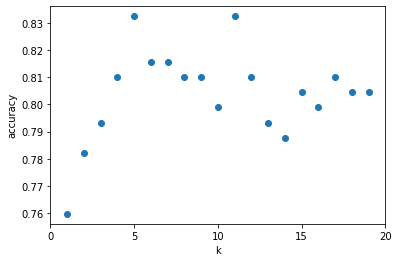

In [48]:
import matplotlib.pyplot as plt
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [49]:
for k in range(1, 26):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    print(f'{k:2d}: {accuracy:.2%}')

 1: 75.98%
 2: 78.21%
 3: 79.33%
 4: 81.01%
 5: 83.24%
 6: 81.56%
 7: 81.56%
 8: 81.01%
 9: 81.01%
10: 79.89%
11: 83.24%
12: 81.01%
13: 79.33%
14: 78.77%
15: 80.45%
16: 79.89%
17: 81.01%
18: 80.45%
19: 80.45%
20: 80.45%
21: 79.33%
22: 79.89%
23: 79.89%
24: 82.12%
25: 81.01%
